In [183]:
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
data = sns.load_dataset('diamonds')

In [184]:
# Dropping NaN columns
data = data.dropna()
data.head()
# data['table']

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


<AxesSubplot:xlabel='depth'>

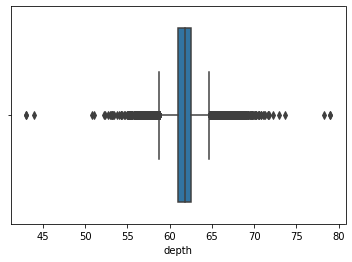

In [137]:
sns.boxplot(x=data['table'])
sns.boxplot(x=data['carat'])
sns.boxplot(x=data['depth'])
sns.boxplot(x=data['price'])
sns.boxplot(x=data['x'])
sns.boxplot(x=data['y'])
sns.boxplot(x=data['z'])

In [168]:
Q1 = data['table'].quantile(0.25)
Q3 = data['table'].quantile(0.75)

IQR = Q3 - Q1

print(IQR)

3.0


In [169]:
# Locating outiers using IQR

lower_lim = Q1 - (1.5 * IQR)
upper_lim = Q3 + (1.5 * IQR)

outliers_low = (data['table'] < lower_lim)
outliers_up = (data['table'] > upper_lim)

data['table'][(outliers_low | outliers_up)]
# print(data)

2        65.0
91       69.0
145      64.0
219      64.0
227      67.0
         ... 
53695    65.0
53697    65.0
53756    64.0
53757    64.0
53785    65.0
Name: table, Length: 605, dtype: float64

In [170]:
# Removing outliers using IQR

data['table'] = data['table'][~(outliers_low | outliers_up)]
print(data)

       carat        cut color clarity  depth  table  price     x     y     z
0       0.23      Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1       0.21    Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2       0.23       Good     E     VS1   56.9    NaN    327  4.05  4.07  2.31
3       0.29    Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4       0.31       Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75
...      ...        ...   ...     ...    ...    ...    ...   ...   ...   ...
53935   0.72      Ideal     D     SI1   60.8   57.0   2757  5.75  5.76  3.50
53936   0.72       Good     D     SI1   63.1   55.0   2757  5.69  5.75  3.61
53937   0.70  Very Good     D     SI1   62.8   60.0   2757  5.66  5.68  3.56
53938   0.86    Premium     H     SI2   61.0   58.0   2757  6.15  6.12  3.74
53939   0.75      Ideal     D     SI2   62.2   55.0   2757  5.83  5.87  3.64

[53940 rows x 10 columns]


       carat        cut color clarity  depth  table  price     x     y     z
0       0.23      Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1       0.21    Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2       0.23       Good     E     VS1   56.9    NaN    327  4.05  4.07  2.31
3       0.29    Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4       0.31       Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75
...      ...        ...   ...     ...    ...    ...    ...   ...   ...   ...
53935   0.72      Ideal     D     SI1   60.8   57.0   2757  5.75  5.76  3.50
53936   0.72       Good     D     SI1   63.1   55.0   2757  5.69  5.75  3.61
53937   0.70  Very Good     D     SI1   62.8   60.0   2757  5.66  5.68  3.56
53938   0.86    Premium     H     SI2   61.0   58.0   2757  6.15  6.12  3.74
53939   0.75      Ideal     D     SI2   62.2   55.0   2757  5.83  5.87  3.64

[53940 rows x 10 columns]


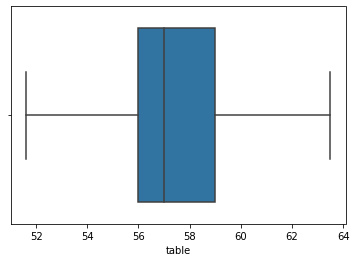

In [171]:
# After removing the outliers

print(data)
sns.boxplot(x = data['table'])
plt.show()

In [185]:
# Removing outliers using Statistics

from numpy import mean, std

# Calculate statistics
data_mean, data_std = mean(data['depth']), std(data['depth'])

# Identify outliers
cut_off = data_std * 3
lower, upper = data_mean - cut_off, data_mean + cut_off
print(lower)
print(upper)

57.451580777313225
66.04722901134085


In [192]:
# outliers = [x for x in data['depth'] if x < lower or x > upper]
# print(outliers)

low = data['depth'] > lower
# print(low)
high = data['depth'] < upper

# # Removing outliers

data['depth'] = data['depth'][low & high] 
# print(data)
data = data.dropna()
print(data)

       carat        cut color clarity  depth  table  price     x     y     z
0       0.23      Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1       0.21    Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
3       0.29    Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4       0.31       Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75
5       0.24  Very Good     J    VVS2   62.8   57.0    336  3.94  3.96  2.48
...      ...        ...   ...     ...    ...    ...    ...   ...   ...   ...
53935   0.72      Ideal     D     SI1   60.8   57.0   2757  5.75  5.76  3.50
53936   0.72       Good     D     SI1   63.1   55.0   2757  5.69  5.75  3.61
53937   0.70  Very Good     D     SI1   62.8   60.0   2757  5.66  5.68  3.56
53938   0.86    Premium     H     SI2   61.0   58.0   2757  6.15  6.12  3.74
53939   0.75      Ideal     D     SI2   62.2   55.0   2757  5.83  5.87  3.64

[53255 rows x 10 columns]


       carat        cut color clarity  depth  table  price     x     y     z
0       0.23      Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1       0.21    Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
3       0.29    Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4       0.31       Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75
5       0.24  Very Good     J    VVS2   62.8   57.0    336  3.94  3.96  2.48
...      ...        ...   ...     ...    ...    ...    ...   ...   ...   ...
53935   0.72      Ideal     D     SI1   60.8   57.0   2757  5.75  5.76  3.50
53936   0.72       Good     D     SI1   63.1   55.0   2757  5.69  5.75  3.61
53937   0.70  Very Good     D     SI1   62.8   60.0   2757  5.66  5.68  3.56
53938   0.86    Premium     H     SI2   61.0   58.0   2757  6.15  6.12  3.74
53939   0.75      Ideal     D     SI2   62.2   55.0   2757  5.83  5.87  3.64

[53255 rows x 10 columns]


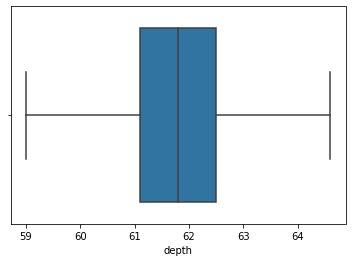

In [194]:
#After removing the outliers

print(data)
sns.boxplot(x = data['depth'], showfliers=False)
plt.show()

<AxesSubplot:xlabel='price'>

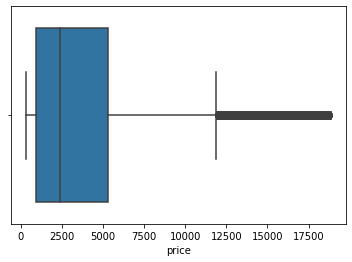

In [202]:
# Removing outliers using Log Trnasformation

data['price'].head()
sns.boxplot(x = data['price'])

In [203]:
import numpy as np

data_log = np.log(data['price'])
# print(data['price'].head())

print(data_log.head())

0    326
1    326
3    334
4    335
5    336
Name: price, dtype: int64
0    5.786897
1    5.786897
3    5.811141
4    5.814131
5    5.817111
Name: price, dtype: float64


<AxesSubplot:xlabel='price'>

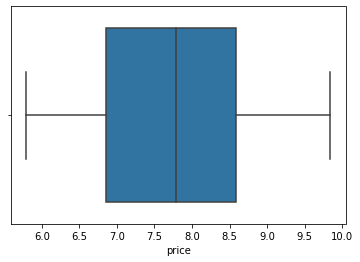

In [204]:
sns.boxplot(x = data_log)